# Working with NLTK and other types of text

So far, we've worked with text from Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP1e is all about getting access to nicely curated texts that you can find built into NLTK.

> _Reading_: NLPP1e Chapter 2.1 - 2.4.

In [1]:
import nltk
import numpy
import matplotlib.pyplot as pyplot
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


>_Exercises_: NLPP1e Chapter 2.
- Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP1e, section 2.8. As always, I recommend you write up your solutions nicely in a notebook.
- Work through exercise 2.8.23 on Zipf's law. Zipf's law connects to a property of the Barabasi-Albert networks. Which one? Take a look at this article and write a paragraph or two describing other important instances of power-laws found on the internet.

4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [2]:
from nltk.corpus import state_union

* Option 1: FreqDist

In [3]:
lookup = ["men", "women", "people"]
fdist = nltk.FreqDist([w.lower() for w in state_union.words()])
for l in lookup:
    print(l + ": ", fdist[l])

men:  232
women:  145
people:  1313


* Option 2: Collections.Counter

In [4]:
import collections
counts = collections.Counter([w.lower() for w in state_union.words()])
for l in lookup:
    print(l + ": ", counts[l])

men:  232
women:  145
people:  1313


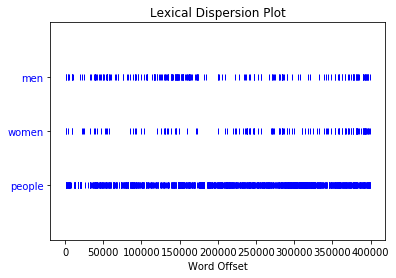

In [5]:
txt = nltk.Text(state_union.words())
txt.dispersion_plot(["men","women", "people"])

cfd = nltk.ConditionalFreqDist((y, l) for l in lookup, for y in yrs)
cfd.tabulate(conditions=yrs, sample=lookup)

8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 2.10).

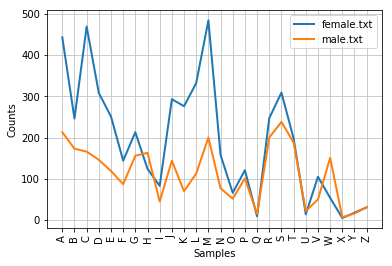

In [6]:
from nltk.corpus import names
cfd = nltk.ConditionalFreqDist(
        (fileid, name[0])
        for fileid in names.fileids()
        for name in names.words(fileid))
cfd.plot()

11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [7]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist((genre, word)
                              for genre in brown.categories()
                              for word in brown.words(categories=genre))
genres = brown.categories()
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres,
            samples=modals)

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 


For example, fiction or mistery tend express topics that are uncertain unlike learned genre, that poses a questions ('may') and answers it ('can').

15. Write a program to find all words that occur at least three times in the Brown Corpus.

In [8]:
def overThreeOcc(corpus):
    words = [w.lower() for w in corpus.words()]
    counts = collections.Counter(words)
    overThree = {}
    for w in words:
        if counts[w] > 2 :
            overThree[w] = counts[w]
    return overThree

In [9]:
overThreeOcc(brown)

{'the': 69971,
 'fulton': 17,
 'county': 155,
 'grand': 48,
 'jury': 67,
 'said': 1961,
 'friday': 60,
 'an': 3740,
 'investigation': 51,
 'of': 36412,
 "atlanta's": 4,
 'recent': 179,
 'primary': 96,
 'election': 77,
 'produced': 90,
 '``': 8837,
 'no': 2139,
 'evidence': 204,
 "''": 8789,
 'that': 10594,
 'any': 1344,
 'irregularities': 8,
 'took': 426,
 'place': 570,
 '.': 49346,
 'further': 218,
 'in': 21337,
 'city': 393,
 'executive': 55,
 'committee': 168,
 ',': 58334,
 'which': 3561,
 'had': 5133,
 'over-all': 35,
 'charge': 122,
 'deserves': 16,
 'praise': 17,
 'and': 28853,
 'thanks': 37,
 'atlanta': 35,
 'for': 9489,
 'manner': 124,
 'was': 9815,
 'conducted': 55,
 'term': 79,
 'been': 2472,
 'charged': 57,
 'by': 5306,
 'superior': 46,
 'court': 230,
 'judge': 77,
 'to': 26158,
 'investigate': 11,
 'reports': 84,
 'possible': 374,
 'won': 68,
 'ivan': 4,
 'allen': 20,
 'jr.': 75,
 'only': 1748,
 'a': 23195,
 'relative': 46,
 'handful': 13,
 'such': 1303,
 'received': 163,
 

16.  Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

Text(0.5,0,'Genres')

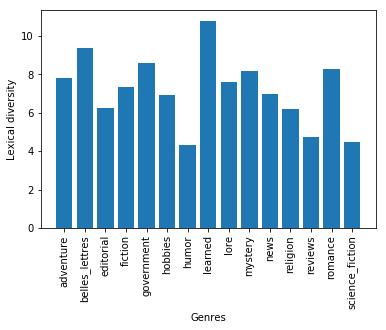

In [10]:
x = brown.categories()
y = [len(brown.words(categories=c))/len(set(brown.words(categories=c))) for c in x]
pyplot.bar(x, y)
pyplot.xticks(rotation="vertical")
pyplot.ylabel('Lexical diversity')
pyplot.xlabel('Genres')

* Learned genre has the lowest diversity. Makes sense since they cover a specific topic in depth. Keeping that in mind, it is easy to understand that they are 'forzed' to use the same word to ease the reader's understanding of the topic.

17.  Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [11]:
from nltk.corpus import stopwords

In [12]:
def findTop50(text):
    fd = FreqDist(text)
    fdNonStop = FreqDist()
    for w in fd:
        if w not in stopwords.words():
            fdNonStop[w] = fd[w]
    return fdNonStop.most_common(50)

In [13]:
findTop50(text5)

[('.', 1268),
 ('JOIN', 1021),
 ('PART', 1016),
 ('?', 737),
 ('lol', 704),
 (',', 596),
 ('I', 576),
 ('hi', 546),
 ('...', 412),
 ('..', 361),
 ('ACTION', 346),
 ('!', 342),
 ('hey', 264),
 ("'s", 195),
 ('....', 170),
 ('like', 156),
 ('chat', 142),
 ("n't", 141),
 ('/', 133),
 ("'m", 133),
 ('good', 130),
 ('U7', 119),
 ('U34', 119),
 ('pm', 108),
 ('wanna', 107),
 ('lmao', 107),
 ('Hi', 104),
 ('know', 103),
 ('get', 102),
 (':)', 101),
 ('U35', 101),
 ('room', 98),
 (':', 96),
 ('ok', 96),
 ('-', 93),
 ('U18', 92),
 ('wb', 91),
 ('one', 87),
 ('"', 87),
 ('LOL', 87),
 ('well', 81),
 ('U30', 81),
 ('oh', 79),
 ('U19', 79),
 ('back', 78),
 ('hiya', 78),
 ('U52', 77),
 ('dont', 75),
 ('@', 75),
 ('yeah', 75)]

18.  Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [16]:
def top50bigrams(text):
    #find bigrams
    bigrams = nltk.bigrams(text)
    fd = FreqDist(bigrams)
    top50 = FreqDist()
    for b in fd:
        #check if either of the words are stop words
        if (b[0] not in stopwords.words() and b[1] not in stopwords.words()):
            top50[b] = fd[b]
    #return the list
    return top50.most_common(50)

In [18]:
top50bigrams(text5)

[(('.', 'ACTION'), 346),
 (('PART', 'JOIN'), 191),
 (('JOIN', 'PART'), 136),
 (('PART', 'PART'), 115),
 (('JOIN', 'JOIN'), 107),
 (('I', "'m"), 89),
 (('.', 'JOIN'), 79),
 (('wanna', 'chat'), 58),
 (('.', 'PART'), 57),
 (('?', 'PART'), 53),
 (('?', 'JOIN'), 49),
 (('JOIN', 'hi'), 46),
 (('?', 'lol'), 45),
 (('JOIN', '.'), 42),
 ((',', 'I'), 40),
 (('lol', 'lol'), 37),
 (('lol', 'PART'), 34),
 (('...', 'lol'), 34),
 (('PART', 'hi'), 34),
 (('PART', 'lol'), 33),
 (('lol', 'hi'), 33),
 (('lol', 'JOIN'), 32),
 (('PART', '.'), 29),
 (('?', '.'), 28),
 (('JOIN', 'lol'), 28),
 (('MODE', '#14-19teens'), 28),
 (('JOIN', 'I'), 25),
 (('?', 'hi'), 25),
 (('NICK', ':'), 24),
 (('PART', 'hey'), 23),
 (('chat', '?'), 23),
 (('PART', 'I'), 23),
 (('....', 'lol'), 23),
 (('JOIN', ':'), 23),
 (('18', '/'), 22),
 (('I', 'know'), 21),
 (('?', 'I'), 21),
 (('.', '.'), 20),
 (('JOIN', 'hey'), 20),
 (('.', 'I'), 20),
 (('.', '13'), 20),
 (('#14-19teens', '+'), 20),
 (('ACTION', 'watches'), 19),
 (('.', 'lol

>_Exercises_: NLPP1e Chapter 2.
- Work through exercise 2.8.23 on Zipf's law. Zipf's law connects to a property of the Barabasi-Albert networks. Which one? Take a look at this article and write a paragraph or two describing other important instances of power-laws found on the internet.

### Zipf's Law: 
Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
23. 
    * Write a function to process a large text and plot word frequency against word rank using pylab.plot.

In [19]:
fdZip = FreqDist(text1)

In [64]:
sortedFdZip = sorted(fdZip.items(), key=lambda fd: fd[1], reverse = True)
ranks = {}
i = 1
for f in sortedFdZip:
    ranks[f[1]] = i
    i = i + 1 

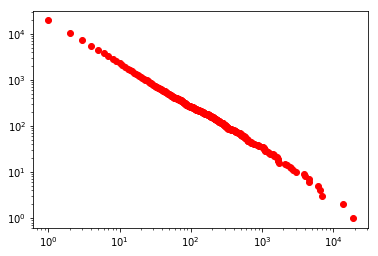

In [72]:
fig = pyplot.figure()
p = fig.add_subplot(111)
p.plot(ranks.keys(), ranks.values(), 'ro')
p.set_xscale('log')
p.set_yscale('log')

- Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale).
    - _Yes, logarithmic view helps seeing the linear relation since being natural text some words are greatly common._
    
- What is going on at the extreme ends of the plotted line?
    - _In the aftermath it seems logical that the most and least used words in a text are just a few and differ with the closest words in frequency._

23.    - Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

In [78]:
import random

In [92]:
rdm_text = ""
for i in range(0, 500000):
    rdm_text = rdm_text + random.choice("qwertyuiopasdfghjklñzxcvbnm ")

In [93]:
fdRdm = FreqDist(rdm_text)
sortedFdRdm = sorted(fdRdm.items(), key=lambda fd: fd[1], reverse = True)
ranksRdm = {}
i = 1
for f in sortedFdRdm:
    ranksRdm[f[1]] = i
    i = i + 1 

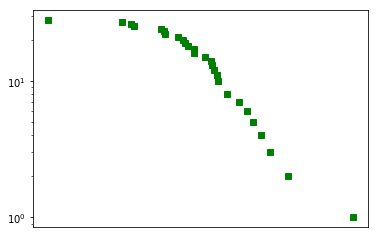

In [94]:
fig = pyplot.figure()
p = fig.add_subplot(111)
p.plot(ranksRdm.keys(), ranksRdm.values(), 'gs')
p.set_xscale('log')
p.set_yscale('log')